# Machine Learning Basics

## Prediction Study Design
1. Split Data into: Training, Validation, and Test
2. Pick Features from Training set: use cross-validation
3. Pick Prediction Model on the Training set: use cross-validation:
    - Apply to Validation Set and refine
    - If no Validation set, apply 1 time to Test set
4. Benchmark: set all varibale to 0 to pinpoint/test model
5. Avoid small sample sizes:
    - Coin flip problem: 
        - For n = 1, Probability of perfect classification (100% accuracy) is 50%
        - For n = 10, Probability of perfect classification (100% accuracy) is 0.10%

## Sample Division

1. Large Sample size:
    - 60% Training
    - 20% Validation
    - 20% Test
2. Small Sample size:
    - 60% Tarining
    - 40% Test
    - No Validation to refine the Model
3. Randomly sample Training and Test sets
    - For data collected over time, build Training set in chunks of time

## In Sample vs Out of Sample Errors
- In Sample Error (resubstitution error): error from prediction on the dataset used to bulid the algorithm
- Out of Sample Error (generalization error): error from prediction on the new dataset
- Over-fitting: when is too optimized for the training set
  - In Sample Error < Out of Sample Error

<hr>

<h1><center>Over-Fitting</center></h1>

## Example of over-fitting:
- Using "kernlab" package, included in "caret"
- Using dataset "spam":
  - A data frame with 4601 observations and 58 variables.
  - The first 48 variables contain the frequency of the variable name (e.g., business) in the e-mail. 
  - If the variable name starts with num (e.g., num650) the it indicates the frequency of the corresponding number (e.g., 650). 
  - The variables 49-54 indicate the frequency of the characters ";", "(", "[", "!", "\$", and "\#" 
  - The variables 55-57 contain the average, longest and total run-length of capital letters. 
  - Variable 58 indicates the type of the mail and is either "nonspam" or "spam", i.e. unsolicited commercial e-mail.



In [1]:
# Load data
library(dplyr)
library(tibble)
library(ggplot2)

library(kernlab)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [2]:
data(spam)
dim(spam)

[1] 4601   58

In [3]:
head(spam)

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [4]:
# Set seed
set.seed(333)

In [5]:
# Pick a small random subset from the spam dataset
small_spam <- spam %>%
  sample_n(10) %>%
  as_tibble()

In [6]:
# Tibble not displaying properly in Jupyter 
dim(small_spam)
head(small_spam)

[1] 10 58

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.000,0,0.000,0.000,0.000,1.000,1,4,nonspam
0.08,0.00,0.93,0,1.52,0.33,0.00,0.08,0.67,0.00,⋯,0.012,0.101,0,0.356,0.101,0.012,11.320,669,1834,spam
0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.684,0,0.684,0.000,0.000,1.000,1,1,nonspam
0.00,0.00,0.55,0,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.092,0,0.000,0.000,0.000,1.840,5,46,nonspam
0.59,0.44,0.29,0,0.14,0.03,0.03,0.14,0.56,0.67,⋯,0.000,0.075,0,0.613,0.532,0.137,7.300,763,2453,spam
0.00,0.00,0.26,0,0.53,0.00,0.00,0.00,0.00,0.00,⋯,0.128,0.042,0,0.000,0.000,0.000,1.635,6,139,nonspam


## Plot the "capitalAve" Variable as either spam or ham based on "type" as color 

In [7]:
small_spam$type

[1] nonspam spam    nonspam nonspam spam    nonspam nonspam spam    spam   
[10] spam   
Levels: nonspam spam

In [8]:
levels(small_spam$type)

[1] "nonspam" "spam"

In [9]:
small_spam$capitalAve

[1]  1.000 11.320  1.000  1.840  7.300  1.635  2.666  3.545  5.163  2.444

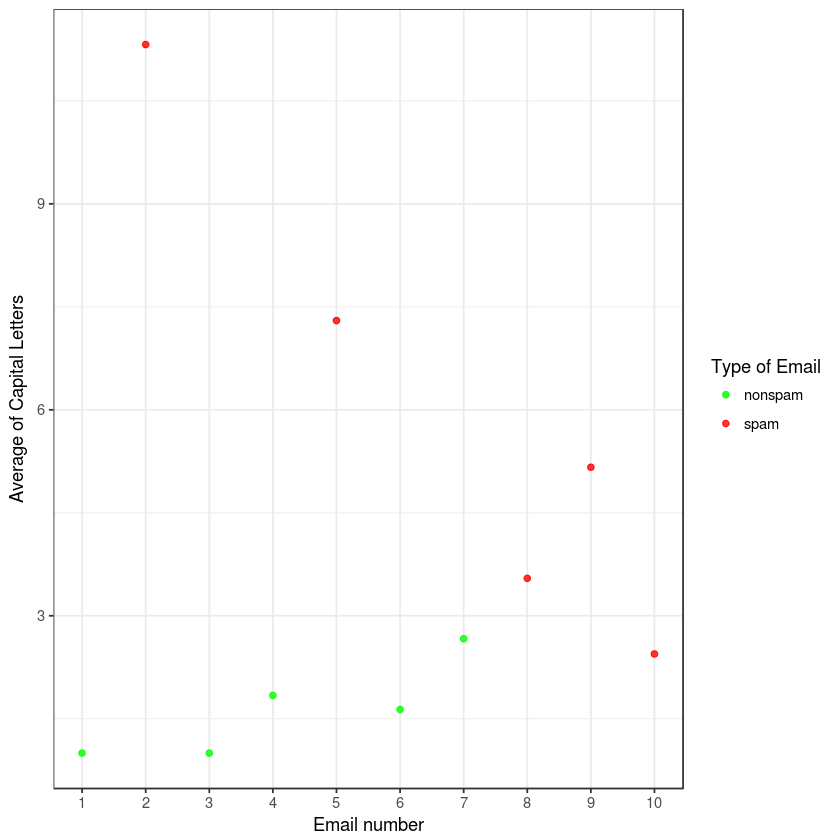

In [10]:
small_spam %>%
  ggplot() +
  theme_bw() +
  geom_point(aes(x = seq_along(capitalAve), y = capitalAve, color = type), alpha = 0.8) +
  scale_x_continuous(name = "Email number", breaks = 1:10, minor_breaks = FALSE) +
  scale_y_continuous(name = "Average of Capital Letters") +
  scale_color_manual(name = "Type of Email", values = c("green", "red"))

<hr>

## Build Prediction Model: Over-fitting based on observation

In [11]:
rule1 <- function(x) {
  # Create vector of NA, length of the Variable passed
  prediction <- rep(NA, length(x))
  
  # Make prediction based on the data to overfit
  prediction[x > 3.30] <- "spam"
  prediction[x < 3.3] <- "nonspam"
  # Include the Outlier spam
  prediction[(x > 2.40 & x < 2.50)] <- "spam" # Outlier
  
  return(prediction)
}

### No Errors in this case. Model is Overfitted

In [12]:
small_spam$capitalAve
result <- rule1(small_spam$capitalAve)
result

[1]  1.000 11.320  1.000  1.840  7.300  1.635  2.666  3.545  5.163  2.444

[1] "nonspam" "spam"    "nonspam" "nonspam" "spam"    "nonspam" "nonspam"
 [8] "spam"    "spam"    "spam"

In [13]:
# Make a table
table(result)

result
nonspam    spam 
      5       5 

In [14]:
table(small_spam$type)


nonspam    spam 
      5       5 

In [15]:
table(result, small_spam$type)

         
result    nonspam spam
  nonspam       5    0
  spam          0    5

## Build Prediction Model: Threshold

In [16]:
rule2 <- function(x) {
  # Create vector of NA, length of the Variable passed
  prediction <- rep(NA, length(x))
  
  # Make prediction based on the data to overfit
  prediction[x > 3.30] <- "spam"
  prediction[x < 3.3] <- "nonspam"
  
  return(prediction)
}

### In Sample Errors in this case. Model is NOT Overfitted

In [17]:
result <- rule2(small_spam$capitalAve)
result

[1] "nonspam" "spam"    "nonspam" "nonspam" "spam"    "nonspam" "nonspam"
 [8] "spam"    "spam"    "nonspam"

In [18]:
# Make a table
table(result)

result
nonspam    spam 
      6       4 

In [19]:
table(small_spam$type)


nonspam    spam 
      5       5 

In [20]:
table(result, small_spam$type)

         
result    nonspam spam
  nonspam       5    1
  spam          0    4

<hr>

## Apply Prediction Models to Test Data

In [21]:
result1 <- rule1(spam$capitalAve)
result2 <- rule2(spam$capitalAve)

In [22]:
table(result1, spam$type)

         
result1   nonspam spam
  nonspam    2348  759
  spam        439 1054

In [23]:
table(result2, spam$type)

         
result2   nonspam spam
  nonspam    2405  801
  spam        382 1012

## Check Accuracy

In [24]:
rbind("Rule 1:" = c(Accuracy = mean(result1 == spam$type, na.rm=TRUE), 
      "Total Correct" = sum(result1 == spam$type,  na.rm=TRUE)),
      "Rule 2:" = c(Accuracy = mean(result2 == spam$type,  na.rm=TRUE), 
       "Total Correct" = sum(result2 == spam$type,  na.rm=TRUE)))

,Accuracy,Total Correct
Rule 1:,0.7395652,3402
Rule 2:,0.7428261,3417
